In [65]:
import csv
import json
import pandas as pd
import numpy as np
import datetime
import time
import requests as rq
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [66]:
bitcoin_bitcoin_df = pd.read_csv("Bitcoin 6 months daily data/bitcoin.csv")
bitcoin_bitcoin_df = bitcoin_bitcoin_df.rename(columns={"Category: All categories":"Bitcoin"})

banned_df = pd.read_csv("Bitcoin 6 months daily data/bitcoin banned.csv")
banned_df = banned_df.rename(columns={"Category: All categories":"Banned"})

bubble_df = pd.read_csv("Bitcoin 6 months daily data/bitcoin bubble.csv")
bubble_df = bubble_df.rename(columns={"Category: All categories":"Bubble"})

collapse_df = pd.read_csv("Bitcoin 6 months daily data/bitcoin collapse.csv")
collapse_df = collapse_df.rename(columns={"Category: All categories":"Collapse"})

crash_df = pd.read_csv("Bitcoin 6 months daily data/bitcoin crash.csv")
crash_df = crash_df.rename(columns={"Category: All categories":"Crash"})

fall_df = pd.read_csv("Bitcoin 6 months daily data/bitcoin fall.csv")
fall_df = fall_df.rename(columns={"Category: All categories":"Fall"})

fraud_df = pd.read_csv("Bitcoin 6 months daily data/bitcoin fraud.csv")
fraud_df = fraud_df.rename(columns={"Category: All categories":"Fraud"})

illegal_df = pd.read_csv("Bitcoin 6 months daily data/bitcoin illegal.csv")
illegal_df = illegal_df.rename(columns={"Category: All categories":"Illegal"})

scam_df = pd.read_csv("Bitcoin 6 months daily data/bitcoin scam.csv")
scam_df = scam_df.rename(columns={"Category: All categories":"Scam"})

tulip_df = pd.read_csv("Bitcoin 6 months daily data/bitcoin tulip.csv")
tulip_df = tulip_df.rename(columns={"Category: All categories":"Tulip"})

worst_df = pd.read_csv("Bitcoin 6 months daily data/bitcoin worst.csv")
worst_df = worst_df.rename(columns={"Category: All categories":"Worst"})

binance_df = pd.read_csv("Bitcoin 6 months daily data/binance.csv")
binance_df = binance_df.rename(columns={"Category: All categories":"Binance"})

blockchain_df = pd.read_csv("Bitcoin 6 months daily data/blockchain.csv")
blockchain_df = blockchain_df.rename(columns={"Category: All categories":"Blockchain"})

boom_df = pd.read_csv("Bitcoin 6 months daily data/boom.csv")
boom_df = boom_df.rename(columns={"Category: All categories":"Boom"})

buy_df = pd.read_csv("Bitcoin 6 months daily data/buy.csv")
buy_df = buy_df.rename(columns={"Category: All categories":"Buy"})

coinbase_df = pd.read_csv("Bitcoin 6 months daily data/coinbase.csv")
coinbase_df = coinbase_df.rename(columns={"Category: All categories":"Coinbase"})

coinmarket_df = pd.read_csv("Bitcoin 6 months daily data/coinmarket.csv")
coinmarket_df = coinmarket_df.rename(columns={"Category: All categories":"Coinmarket"})

gdax_df = pd.read_csv("Bitcoin 6 months daily data/gdax.csv")
gdax_df = gdax_df.rename(columns={"Category: All categories":"GDAX"})

kraken_df = pd.read_csv("Bitcoin 6 months daily data/kraken.csv")
kraken_df = kraken_df.rename(columns={"Category: All categories":"Kraken"})

price_df = pd.read_csv("Bitcoin 6 months daily data/price.csv")
price_df = price_df.rename(columns={"Category: All categories":"Price"})

race_df = pd.read_csv("Bitcoin 6 months daily data/race.csv")
race_df = race_df.rename(columns={"Category: All categories":"Race"})

In [67]:
bitcoin_df = pd.concat([banned_df,bubble_df,collapse_df,crash_df,fall_df,fraud_df,illegal_df,scam_df,tulip_df,worst_df,
                        binance_df,blockchain_df,boom_df,buy_df,coinbase_df,coinmarket_df,gdax_df,kraken_df,price_df,race_df,
                        bitcoin_bitcoin_df], axis=1)
bitcoin_df = bitcoin_df.reset_index()
bitcoin_df = bitcoin_df.rename(columns={"index":"Date"})
bitcoin_df.drop(bitcoin_df.head(1).index, inplace=True)
#price_volume_df.drop(price_volume_df.tail(15).index,inplace=True)
bitcoin_df = bitcoin_df.replace("<1","0.5")
bitcoin_df = bitcoin_df.apply(pd.to_numeric, errors='ignore')
bitcoin_df["Positive"] = bitcoin_df.iloc[:,11:20].mean(axis=1)
bitcoin_df["Negative"] = bitcoin_df.iloc[:,1:10].mean(axis=1)
bitcoin_df["Positive"] = bitcoin_df["Positive"].round()
bitcoin_df["Negative"] = bitcoin_df["Negative"].round()
bitcoin_sentiment_df = bitcoin_df.loc[:,["Date","Bitcoin","Positive","Negative"]]
bitcoin_df.to_csv("Bitcoin Positive Negative Sentiment.csv")
 

In [68]:
bitcoin_df.head()


,Date,Banned,Bubble,Collapse,Crash,Fall,Fraud,Illegal,Scam,Tulip,...,Buy,Coinbase,Coinmarket,GDAX,Kraken,Price,Race,Bitcoin,Positive,Negative
1,2017-09-15,37,9.0,14,7.0,18,19,18,34,5,...,10,5,19,4,13,16,3,18,11.0,18.0
2,2017-09-16,33,3.0,0,1.0,8,42,7,24,4,...,7,4,0,5,9,10,0,12,5.0,14.0
3,2017-09-17,0,2.0,15,2.0,2,14,20,16,4,...,6,2,0,4,11,7,3,10,4.0,8.0
4,2017-09-18,0,4.0,7,2.0,3,18,0,13,7,...,8,3,6,2,12,9,0,11,9.0,6.0
5,2017-09-19,0,4.0,7,2.0,0,24,18,35,4,...,7,3,18,5,17,8,0,11,8.0,10.0


In [69]:
url = "https://min-api.cryptocompare.com/data/histoday"

parameters = {"fsym":"BTC","tsym":"USD","limit":"196"}

btc_json = rq.get(url, params=parameters).json()

btc_price=[]
btc_volume=[]
btc_timestamp=[]
btc_date=[]

# pprint(btc_json)

for data in btc_json['Data']:
    btc_price.append(data['close'])
    btc_volume.append(data['volumefrom'])
   #date = datetime.datetime.fromtimestamp(data['time']).isoformat()
    date = datetime.datetime.fromtimestamp(int(data['time'])).strftime('%Y-%m-%d')
    btc_date.append(date)
    btc_timestamp.append(data['time'])

df = pd.DataFrame({"Date":btc_date, "Price":btc_price, "Volume":btc_volume})

# Export file as a CSV, without the Pandas index, but with the header
df.to_csv("Bitcoin_Price_Volume.csv", index=False, header=True)
df.head()

,Date,Price,Volume
0,2017-09-19,3882.16,86645.15
1,2017-09-20,3617.27,145124.78
2,2017-09-21,3600.83,114717.36
3,2017-09-22,3788.02,67820.32
4,2017-09-23,3667.52,49661.76


In [70]:
price_volume_df = pd.read_csv("Bitcoin 6 months daily data/bitcoin_price_volume.csv")
price_volume_df.drop(price_volume_df.tail(15).index,inplace=True)
bitcoin_spv_df = pd.merge(bitcoin_sentiment_df, price_volume_df, on="Date")
bitcoin_spv_df.to_csv("Bitcoin_Sentiment_Price_Volume_Data.csv")
bitcoin_spv_df.head()

,Date,Bitcoin,Positive,Negative,price,volume
0,2017-09-15,18,11.0,18.0,3698.92,169361.61
1,2017-09-16,12,5.0,14.0,3689.61,96068.08
2,2017-09-17,10,4.0,8.0,4100.28,147927.08
3,2017-09-18,11,9.0,6.0,3907.96,123214.81
4,2017-09-19,11,8.0,10.0,3882.16,86645.15


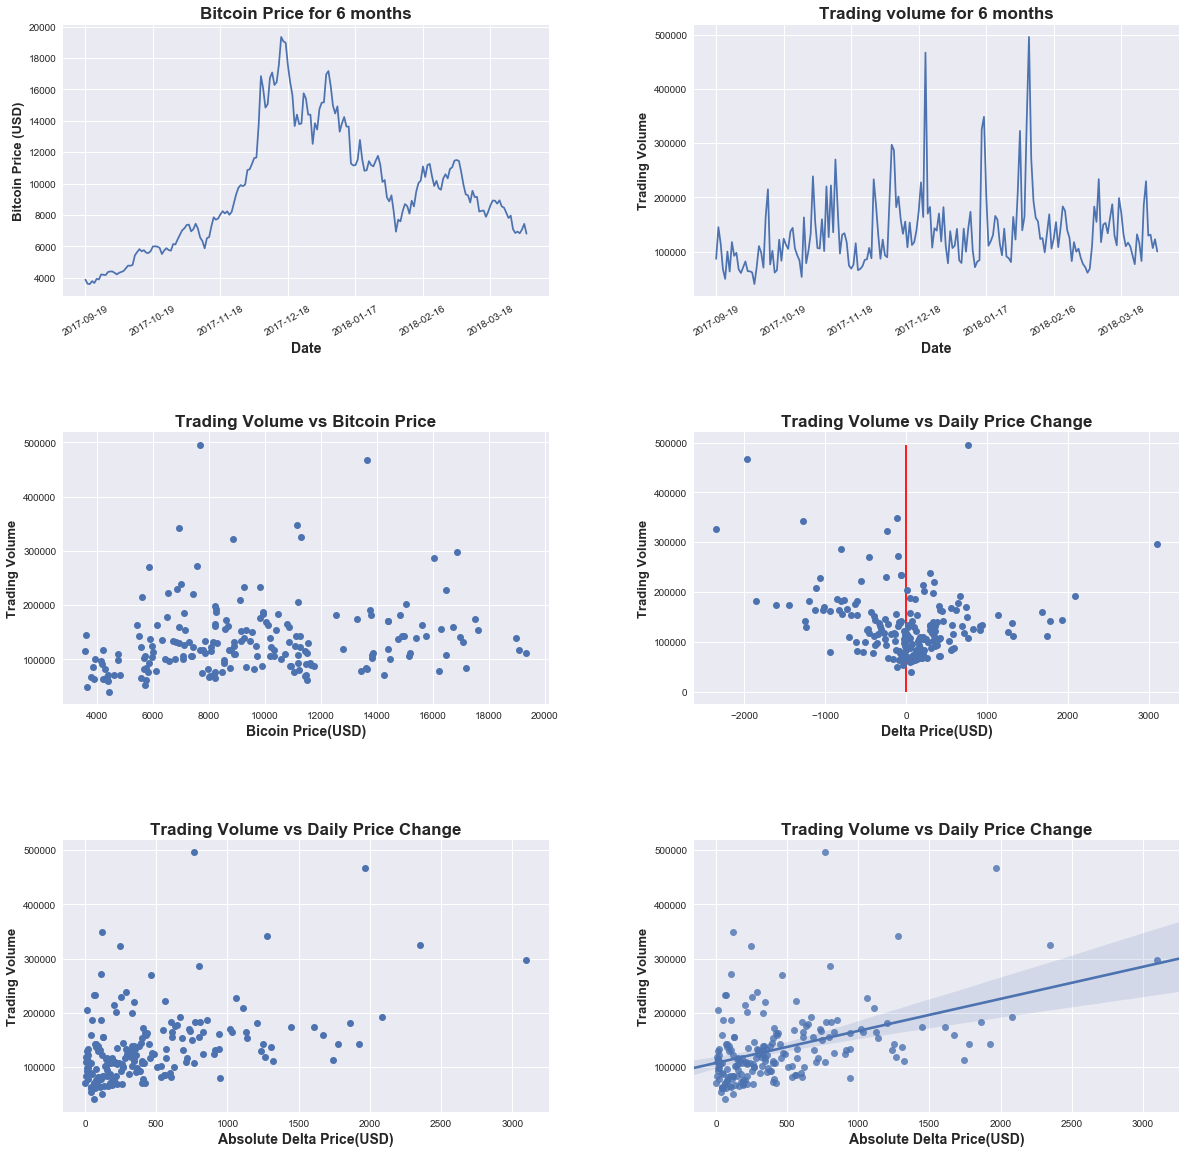

In [71]:
x_axis = btc_date
y_axis = btc_price

df['delta_price'] = df['Price'].diff(1)
df['Abs_delta_price'] = df['delta_price'].abs()
df.head()

fig = plt.figure(figsize=(20, 20)) 

plt.subplot(3,2,1)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
plt.plot(x_axis, y_axis)
plt.title("Bitcoin Price for 6 months", fontsize=17, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Bitcoin Price (USD)', fontsize=13, fontweight='bold')
plt.xticks(np.arange(0,181,  step = 30), [btc_date[i] for i in np.arange(0,181,  step = 30)], rotation=30)

plt.subplot(3,2,2)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
plt.plot(x_axis, btc_volume)
plt.title("Trading volume for 6 months", fontsize=17, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Trading Volume', fontsize=13, fontweight='bold')
plt.xticks(np.arange(0,181,  step = 30), [btc_date[i] for i in np.arange(0,181,  step = 30)], rotation=30)

plt.subplot(3,2,3)

plt.plot(btc_price, btc_volume, linewidth=0, marker='o')
plt.title("Trading Volume vs Bitcoin Price", fontsize=17, fontweight='bold')
plt.xlabel('Bicoin Price(USD)', fontsize=14, fontweight='bold')
plt.ylabel('Trading Volume', fontsize=13, fontweight='bold')

plt.subplot(3,2,4)
vert_line = 0
plt.vlines(x=vert_line, ymin=0, ymax=max(df['Volume']), color='red', zorder=2)
plt.plot(df['delta_price'], df['Volume'],linewidth=0, marker='o')
plt.title("Trading Volume vs Daily Price Change", fontsize=17, fontweight='bold')
plt.xlabel('Delta Price(USD)', fontsize=14, fontweight='bold')
plt.ylabel('Trading Volume', fontsize=13, fontweight='bold')

plt.subplot(3,2,5)
plt.plot(df['Abs_delta_price'], df['Volume'],linewidth=0, marker='o')
plt.title("Trading Volume vs Daily Price Change", fontsize=17, fontweight='bold')
plt.xlabel('Absolute Delta Price(USD)', fontsize=14, fontweight='bold')
plt.ylabel('Trading Volume', fontsize=13, fontweight='bold')

plt.subplot(3,2,6)
sns.regplot(x='Abs_delta_price', y='Volume', data=df)
plt.title("Trading Volume vs Daily Price Change", fontsize=17, fontweight='bold')
plt.xlabel('Absolute Delta Price(USD)', fontsize=14, fontweight='bold')
plt.ylabel('Trading Volume', fontsize=13, fontweight='bold')

plt.savefig("BitcoinAnalysis.png")
plt.show()

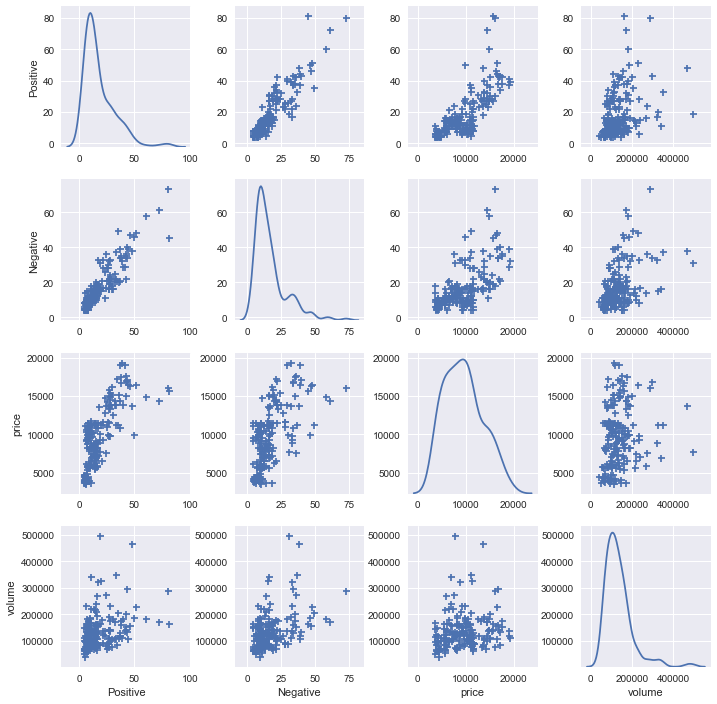

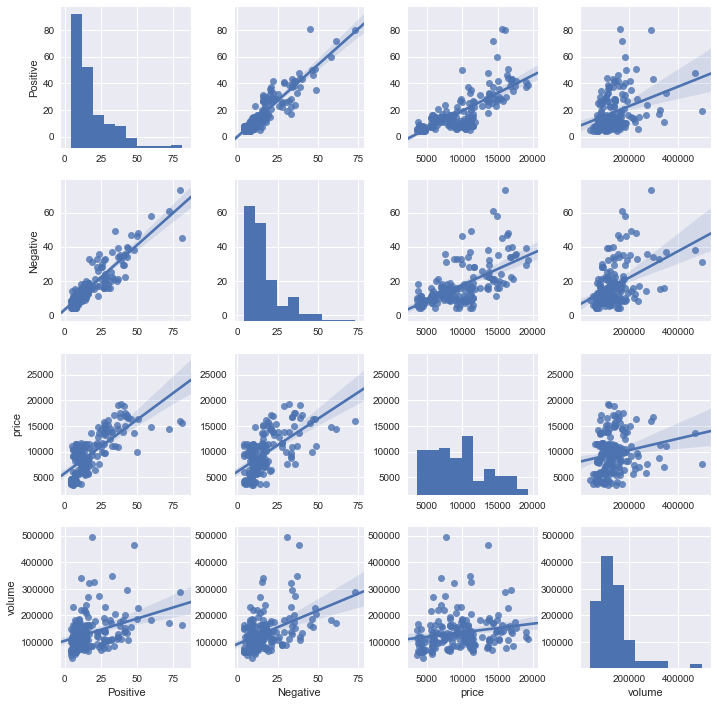

In [72]:
bitcoin_bitcoin_df = pd.read_csv("Bitcoin 6 months daily data/Bitcoin_Sentiment_Price_Volume_Data.csv")
df = bitcoin_bitcoin_df.drop('Bitcoin', 1)
#df = bitcoin_spv_df.drop('Bitcoin',1)
final_data= df.drop('Unnamed: 0', 1)
sns.pairplot(final_data, diag_kind="kde", markers="+")
plt.savefig('correlation2.png')
sns.pairplot(final_data, kind="reg")
plt.savefig('correlation1.png')
plt.show()

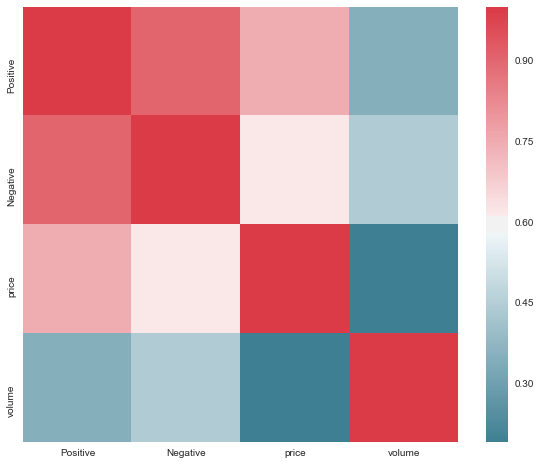

In [73]:
f, ax = plt.subplots(figsize=(10, 8))
corr = final_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig('Heatmap.png')
plt.show()